<h2 style="color:green" align="center">Linear Regression With One Variable: Homeprice Prediction</h2>

# Exercise: 
Dataset represents current home prices in monroe township based on square feet area, new jersey in excel file "homeprice".
Testset represents in excel file "prediction".

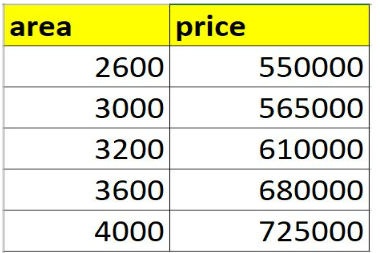

In [4]:
from IPython.display import Image
Image(filename='E:\Python\ML_Learn\Predict_Home_Price_Model\Homeprice.png')

Problem Statement: Given above data build a machine learning model that can predict home prices based on square feet area. Then from the testset data output the predict homeprice trained from dataset in testset excel file.

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart.

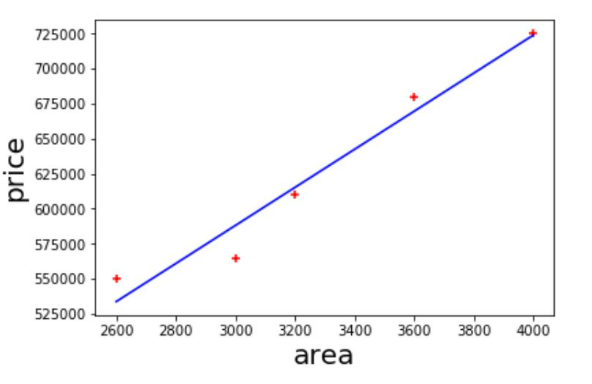

In [6]:
Image(filename= 'E:\Python\ML_Learn\Predict_Home_Price_Model\DatasetChart.png')

LR: Find the fitting line so that the lost function gets minimum value.

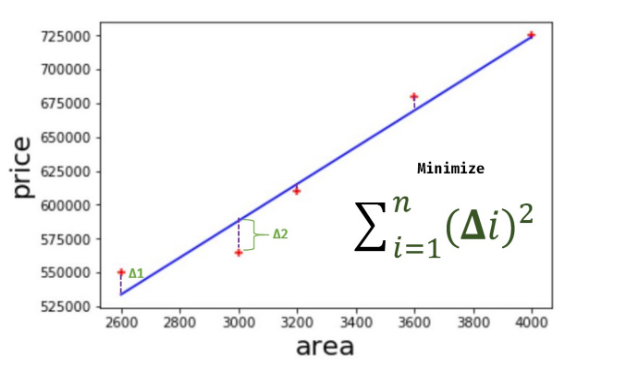

In [7]:
Image(filename= 'E:\Python\ML_Learn\Predict_Home_Price_Model\Fittingline.png')

<h2 style="color:Red" align="left">Implementation</h2>

In [74]:
#Import package
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
#Load and read dataset file
df = pd.read_csv('E:\Python\ML_Learn\Predict_Home_Price_Model\Dataset.csv') #Load dataset from computer
df #Display


,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


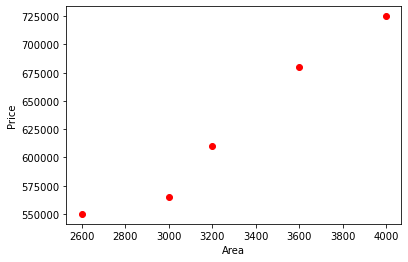

In [38]:
#Visualize data
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(df.Area,df.Price,color = "red", marker = "o")
plt.show()

In [43]:
#Construct data to implement library
new_df = df.drop("Price",axis = "columns") #Built X vector in the LR equation y = x dot w(T). Input of dataset
new_df


,Area
0,2600
1,3000
2,3200
3,3600
4,4000


In [45]:
price = df.Price #Output of dataset
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

[135.78767123]
180616.43835616432


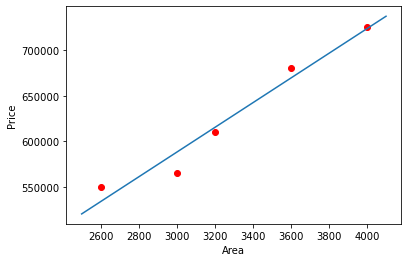

In [67]:
#Create LR model
reg = linear_model.LinearRegression()
reg.fit(new_df.values,price.values)
print(reg.coef_)
print(reg.intercept_)
#Plot fitting line
plt.xlabel("Area")
plt.ylabel("Price")
x = np.linspace(2500,4100,num=2)
y = reg.coef_ * x + reg.intercept_
plt.plot(x,y)
plt.scatter(df.Area,df.Price,color = "red", marker = "o")
plt.show()

## The LR equation is : y = 135.78767123x + 180616.43835616432

In [57]:
#Predict some other inputs
print(reg.predict([[3300]]))
print(reg.predict([[5000]]))

[628715.75342466]
[859554.79452055]


<h2 style="color:Red" align="left">Generate CSV file to store price prediction from testset</h2>

In [61]:
#Load testset
area_df = pd.read_csv('E:\Python\ML_Learn\Predict_Home_Price_Model\Testset.csv')
area_df

,Area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [64]:
prediction = reg.predict(area_df.values) #Predict output from testset using trained model from dataset
prediction

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [69]:
area_df["Price"]= prediction #Insert Price column to testset
area_df

,Area,Price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [72]:
area_df.to_csv('E:\Python\ML_Learn\Predict_Home_Price_Model\Testset.csv')
#Store prediction result to initial testset file